# Question 1 Analysis 3
In this analysis we will try to analyze the sent emails of Kenneth Lay, Jeffrey Skilling, John forney, Greg Whalley, Vincent Kaminiski and David Delainey and try to see who all they sent emails to.

In [ ]:
import re
import os
import string

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.lancaster import LancasterStemmer
from collections import Counter
import networkx as nx

In [5]:
plt.style.use('ggplot')
plt.rcParams['font.size']=15

In [10]:
# To extract five data: email from, enail to, subject, email text, sent date
def read_email(path):
    from_list = []
    to_list = []
    subject_list = []
    date_list = []
    text_list = []

    # Regular expression to extract data
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'r') as content_file:
            content = content_file.read()
            # From
            from_list.append(re.findall('[\n\r].*From: \s*([^\n\r]*)', content)[0])
            # To
            to_list.append(re.findall('[\n\r].*To: \s*([^\n\r]*)', content)[0])
            # Subject
            subject = re.findall('Subject: (?s)(.*)Mime-Version', content)[0]
            subject = subject.replace('\n', '')
            subject_list.append(subject)
            # Date
            date_list.append(re.findall('[\n\r].*Date: \s*([^\n\r]*)', content)[0])
            # Email text
            text_original = re.findall("(?<=X-FileName:)[.|\n|\W|\w]*", content)[0]
            text = text_original.replace('\n', '')
            text = text.replace('pallen (Non-Privileged).pst', '')
            text = text.replace('pallen.nsf', '')
            text_list.append(text)

    # Using 5 lists to build Pandas DataFrame
    email_data = {'From': from_list, 'To': to_list, 'Subject': subject_list, 'Date': date_list, 'Text': text_list}
    df = pd.DataFrame(email_data, columns=['From', 'To', 'Subject', 'Date', 'Text'])
    # Change "" in df to NaN
    df = df.replace('', np.nan, regex=True)
    return df

# Read email from folders to dataframes
df_whalley = read_email('data/enron/maildir/whalley-g/_sent_mail/')
df_kaminski = read_email('data/enron/maildir/kaminski-v/_sent_mail/')
df_lay = read_email('data/enron/maildir/lay-k/sent_items/')
df_skilling = read_email('data/enron/maildir/skilling-j/_sent_mail/')
df_delainey = read_email('data/enron/maildir/delainey-d/_sent_mail/')
df_forney = read_email('data/enron/maildir/forney-j/sent_items/')

These tables give us the information the people mentioned above have emailed whom

In [11]:
df_whalley.head()

,From,To,Subject,Date,Text
0,greg.whalley@enron.com,michelle.nelson@enron.com,"Re: Tuesday, June 12th Reports","Tue, 12 Jun 2001 17:15:00 -0700 (PDT)",gwhalley.nsfhow did my august position change...
1,greg.whalley@enron.com,michelle.nelson@enron.com,"Re: Wednesday, June 6th Reports","Wed, 6 Jun 2001 14:50:00 -0700 (PDT)",gwhalley.nsfi have a question on my p&l. how...
2,greg.whalley@enron.com,mark.frevert@enron.com,RE: Draft of Organizational Announcement,"Wed, 6 Jun 2001 14:42:00 -0700 (PDT)",gwhalley.nsfthis announcement has not gone ou...
3,greg.whalley@enron.com,john.lavorato@enron.com,Re: FW: Gas Curve Validation April 2001,"Tue, 5 Jun 2001 23:09:00 -0700 (PDT)",gwhalley.nsfyou should look into this. not t...
4,greg.whalley@enron.com,stu.staley@enron.com,Re: Meeting next week,"Tue, 5 Jun 2001 23:02:00 -0700 (PDT)",gwhalley.nsfwhere are you right now? i am in...


In [12]:
df_kaminski.head()

,From,To,Subject,Date,Text
0,vince.kaminski@enron.com,"stephen.stock@enron.com, beth.perlman@enron.com",A resume for Londom,"Mon, 7 May 2001 08:41:00 -0700 (PDT)",vkamins.nsfThis is a resume of one guy I met ...
1,vince.kaminski@enron.com,vkaminski@aol.com,Btu's Weekly Power Report,"Mon, 7 May 2001 05:28:00 -0700 (PDT)",vkamins.nsf---------------------- Forwarded b...
2,vince.kaminski@enron.com,vkaminski@aol.com,NaN,"Mon, 30 Apr 2001 08:47:00 -0700 (PDT)",vkamins.nsfhttp://www.x10.com/home/offer.cgi?...
3,vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,"Fri, 12 Jan 2001 08:07:00 -0800 (PST)",vkamins.nsfFYIVince---------------------- For...
4,vince.kaminski@enron.com,stinson.gibner@enron.com,update on energy book,"Fri, 12 Jan 2001 08:05:00 -0800 (PST)",vkamins.nsf---------------------- Forwarded b...


In [13]:
df_lay.head()

,From,To,Subject,Date,Text
0,kenneth.lay@enron.com,"tom.acton@enron.com, janie.aguayo@enron.com, a...",Thank You,"Wed, 30 May 2001 13:00:47 -0700 (PDT)","Lay, Kenneth.pstI want to take this opportuni..."
1,kenneth.lay@enron.com,"erica.adams@enron.com, john.addison@enron.com,...",Associate/Analyst ProgramCc: billy.lemmons@enr...,"Thu, 23 Aug 2001 11:24:25 -0700 (PDT)",KLAY (Non-Privileged).pst To:\tAssociate/Anal...
2,kenneth.lay@enron.com,rickbe@microsoft.com,NaN,"Thu, 16 Aug 2001 14:25:16 -0700 (PDT)",KLAY (Non-Privileged).pstRick:As I am sure yo...
3,kenneth.lay@enron.com,mccann@nc.rr.com,"DELETE KENNETH L. LAY ""RTP"" - RE: Kenneth, her...","Wed, 19 Dec 2001 04:50:53 -0800 (PST)",klay (Non-Privileged).pst -----Original Messa...
4,kenneth.lay@enron.com,wired@condenast.flonetwork.com,DELETE FROM E-MAIL ADDRESS - RE: Wired Rescues...,"Wed, 19 Dec 2001 04:51:44 -0800 (PST)",klay (Non-Privileged).pst -----Original Messa...


In [14]:
df_skilling.head()

,From,To,Subject,Date,Text
0,sherri.sera@enron.com,jana.paxton@enron.com,Re: Dabhol Task Force Weekly Call,"Wed, 13 Dec 2000 07:05:00 -0800 (PST)","jskillin.nsfJana, would you please add me to ..."
1,sherri.sera@enron.com,ds@cogentco.com,Re: Cogent Communications,"Wed, 6 Dec 2000 07:49:00 -0800 (PST)","jskillin.nsfDear Mr. Schaeffer,Apologies for ..."
2,sherri.sera@enron.com,trish3kids@aol.com,MS150,"Wed, 5 Apr 2000 04:20:00 -0700 (PDT)","jskillin.nsfPatti,It was good to see you and ..."
3,sherri.sera@enron.com,greg.grissom@enron.com,Re: More tickets for Friday night...,"Wed, 5 Apr 2000 04:15:00 -0700 (PDT)",jskillin.nsfThey don't have to be with the ot...
4,sherri.sera@enron.com,greg.grissom@enron.com,More tickets for Friday night...,"Wed, 5 Apr 2000 03:32:00 -0700 (PDT)","jskillin.nsfGreg, if there are two more ticke..."


In [15]:
df_delainey.head()

,From,To,Subject,Date,Text
0,david.delainey@enron.com,"janet.dietrich@enron.com, christopher.calger@e...",Re: MEH Turbines,"Tue, 12 Dec 2000 12:19:00 -0800 (PST)","ddelain.nsfGuys, here are the details on the ..."
1,david.delainey@enron.com,"greg.wolfe@enron.com, tim.belden@enron.com","Cc: mark.haedicke@enron.com, john.lavorato@enr...","Fri, 8 Dec 2000 07:34:00 -0800 (PST)","ddelain.nsfguys, phone numbers:Home: 713-592..."
2,david.delainey@enron.com,mike.curry@enron.com,Wind Dash,"Mon, 13 Nov 2000 05:59:00 -0800 (PST)","ddelain.nsfMike, can you keep the approval am..."
3,kay.chapman@enron.com,dlhart1@aep.com,Re: Confidential,"Mon, 13 Nov 2000 05:31:00 -0800 (PST)",ddelain.nsfDavid W Delainey11/13/2000 10:55 A...
4,david.delainey@enron.com,paul.clayton@enron.com,Insurance Costs,"Mon, 13 Nov 2000 05:07:00 -0800 (PST)","ddelain.nsfPaul, thanks for the note. Please..."


In [16]:
df_forney.head()

,From,To,Subject,Date,Text
0,m..forney@enron.com,george.phillips@enron.com,RE: Couple of Questions,"Tue, 4 Sep 2001 08:09:02 -0700 (PDT)","JFORNEY (Non-Privileged).pstHello, George.1...."
1,m..forney@enron.com,erik.serio@enron.com,FW: Frontera OOM for 8/30,"Thu, 6 Sep 2001 12:18:38 -0700 (PDT)",JFORNEY (Non-Privileged).pst -----Original Me...
2,m..forney@enron.com,kim.melodick@enron.com,Moving Expenses,"Mon, 15 Oct 2001 09:04:49 -0700 (PDT)","JFORNEY (Non-Privileged).pstKim,I had mention..."
3,m..forney@enron.com,william.crooks@enron.com,RE: Enpower changes,"Mon, 15 Oct 2001 09:29:52 -0700 (PDT)",JFORNEY (Non-Privileged).pstAny luck with the...
4,m..forney@enron.com,kim.melodick@enron.com,RE: Moving Expenses,"Mon, 15 Oct 2001 10:23:21 -0700 (PDT)","JFORNEY (Non-Privileged).pstkim, thanks so m..."


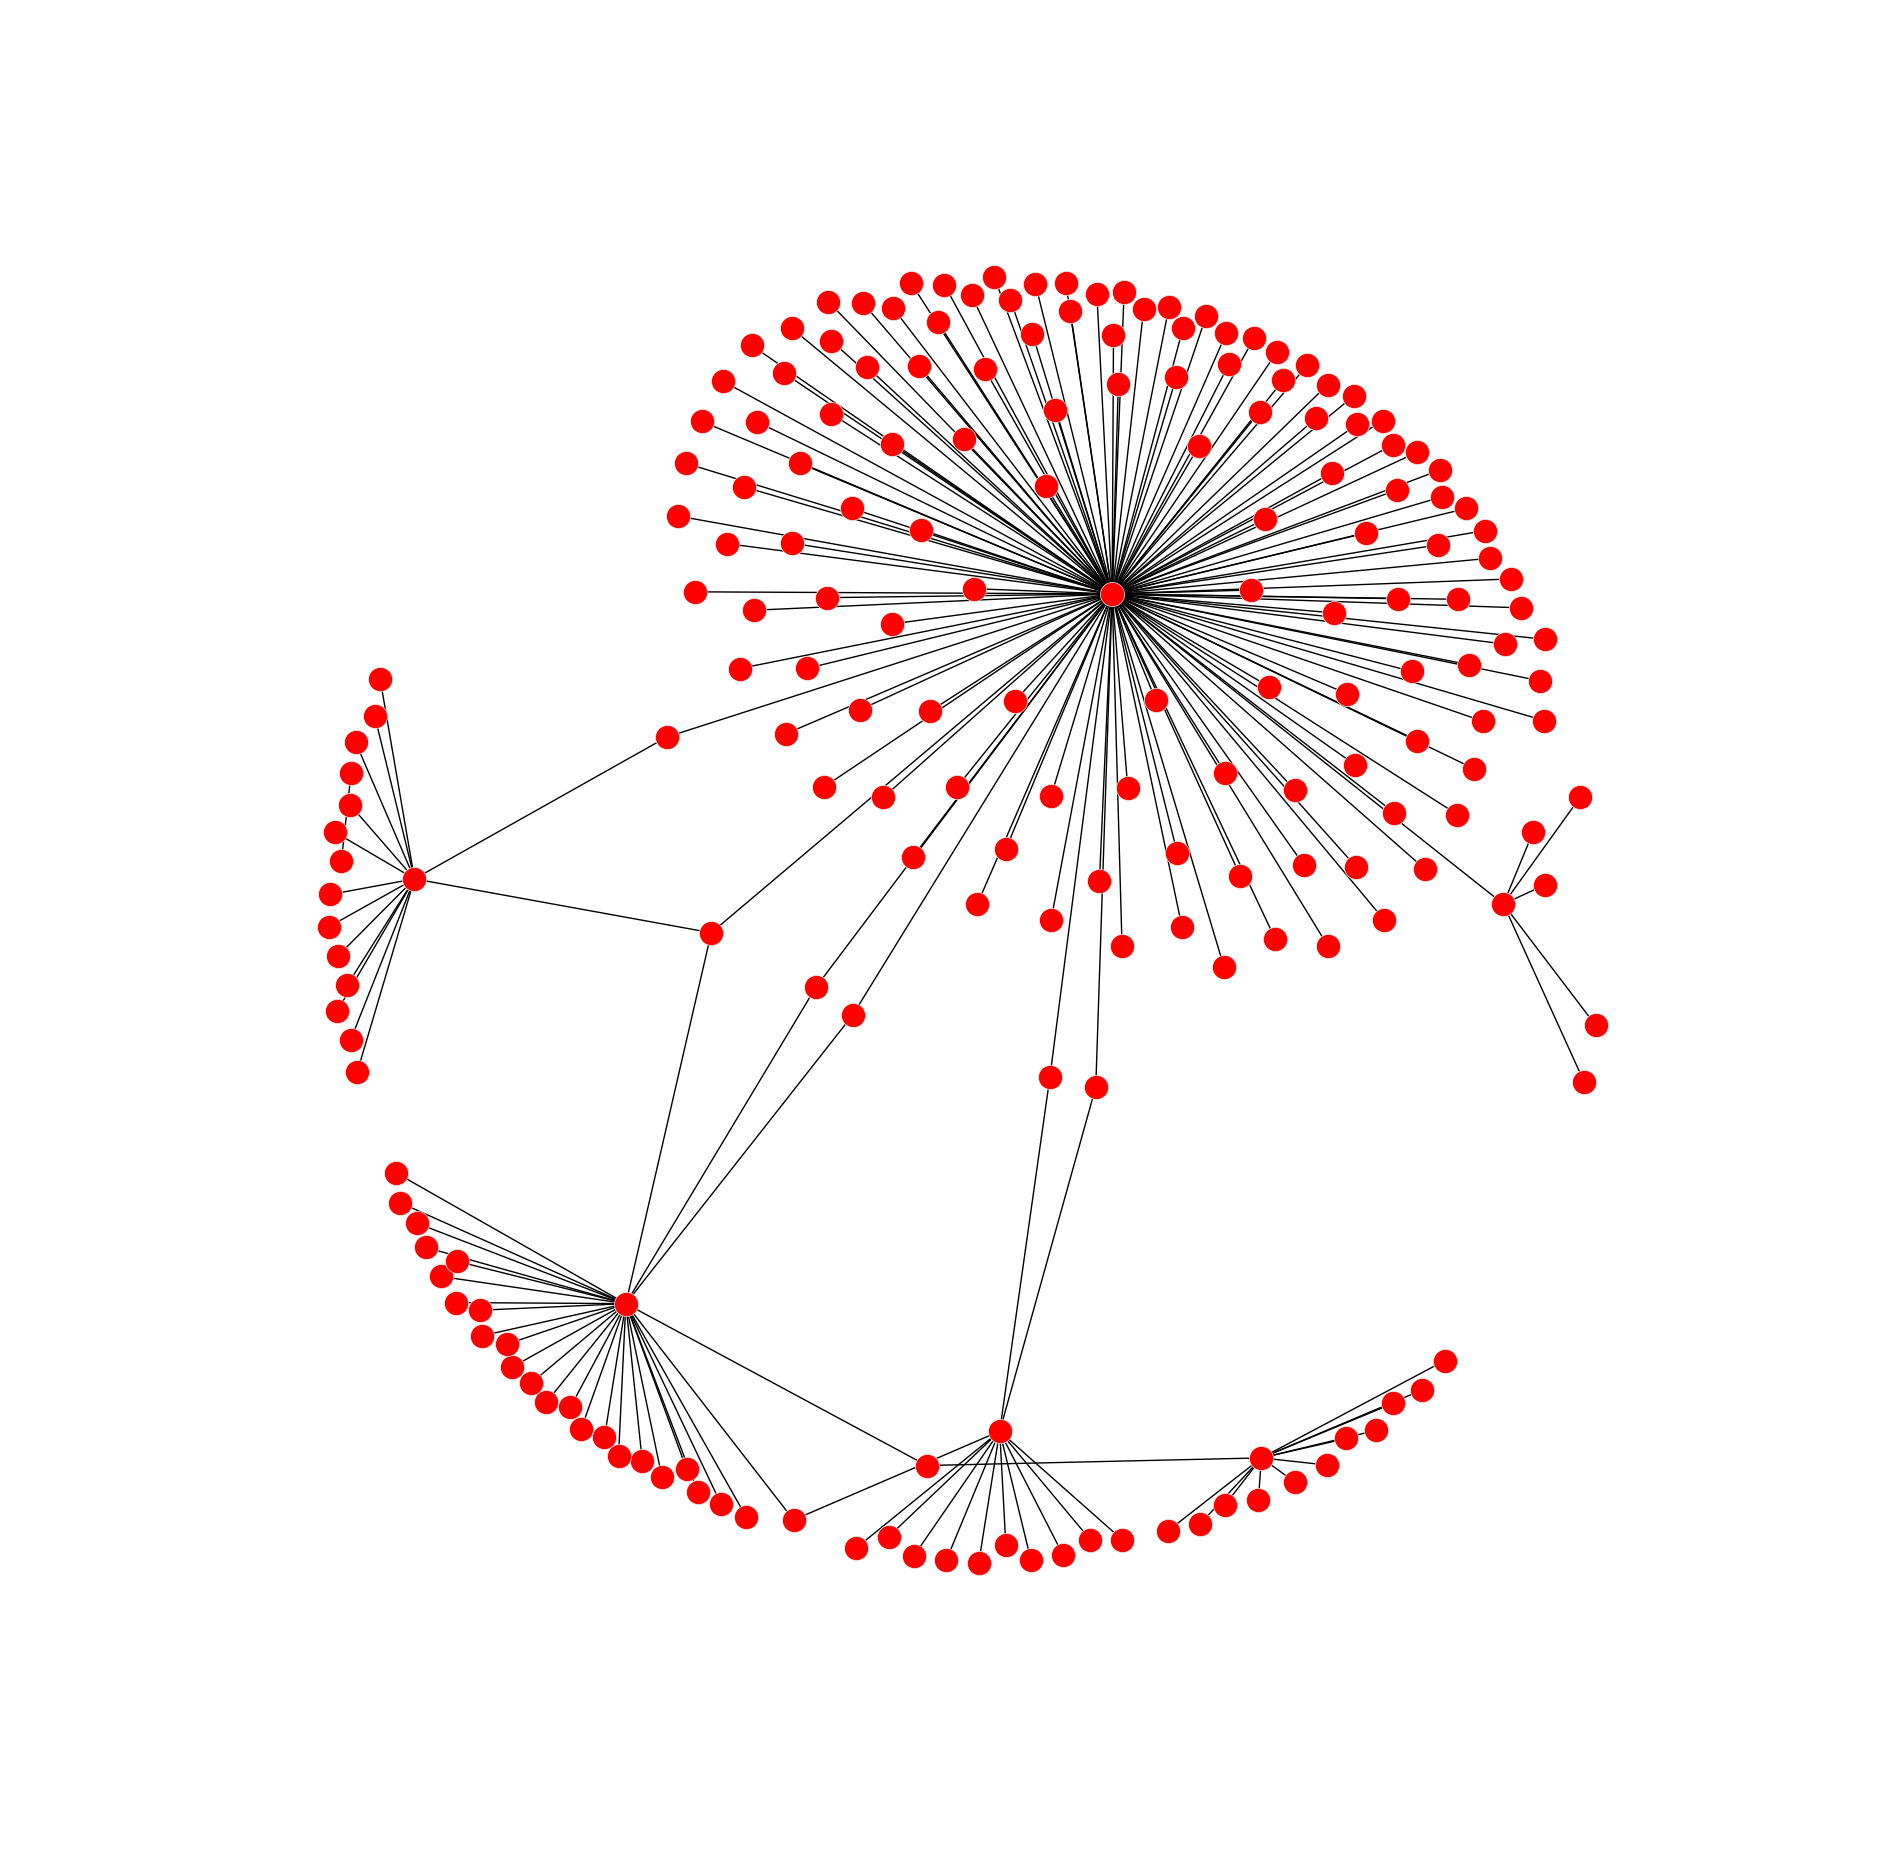

In [24]:
G = nx.Graph()
fig = plt.figure(figsize=(18,18))

def nodes(dataframe):
    for i in range(len(dataframe)):
        sender = dataframe['From'][i]
        recipient = dataframe['To'][i]
        G.add_edge(sender,recipient)
        

nodes(df_lay)
nodes(df_skilling)

nx.draw(G,pos=nx.spring_layout(G))
plt.show()

The above network plot gives us if they sent emails to each others as well 

In [31]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
contact = []
for email in df_skilling['To']:
    if regex.match(email):
        contact.append(regex.match(email).groups()[0])
    else:
        contact.append('')
df_skilling['Contact'] = contact

In [32]:
df_skilling['Contact'].value_counts()[:20]

kskilling            10
amelia.alder          8
markskilling          8
kcompton              7
stanmarek             6
sherri.sera           5
eharris               5
matthew.scrimshaw     4
jay.fitzgerald        4
fredinvt              4
mike_buttrey          4
gkoutani              3
david.delainey        3
dottie                3
dorothy.dalton        3
nkelley               3
kevin.hannon          3
chuck.paul            3
annb                  3
tamara.reed           2
Name: Contact, dtype: int64

In [37]:
# Group the DataFrame by 'Contact' column and combine all text to 'stagecoachmama'
email_text = (" ").join(df_skilling.groupby('Contact')['Text'].apply(list)['sherri.sera'])

# The same process as before
email_text = email_text.lower()
words = "".join([ch for ch in email_text if ch not in string.punctuation])
tokens = nltk.word_tokenize(words)
filtered = [w for w in tokens if not w in stopwords.words('english')]
# lanste = LancasterStemmer()
# stemmed = [lanste.stem(i) for i in filtered]
count = Counter(filtered)
words_used = count.most_common(20)
words_used

[('jeff', 9),
 ('march', 7),
 ('investigation', 6),
 ('turkish', 6),
 ('energy', 6),
 ('yes', 6),
 ('gama', 4),
 ('sector', 4),
 ('jskillinnsf', 4),
 ('skillingcorpenron', 4),
 ('forwarded', 4),
 ('bureaucrats', 4),
 ('pm', 4),
 ('report', 4),
 ('reported', 3),
 ('corruption', 3),
 ('joe', 3),
 ('subject', 3),
 ('monday', 3),
 ('yardim', 3)]

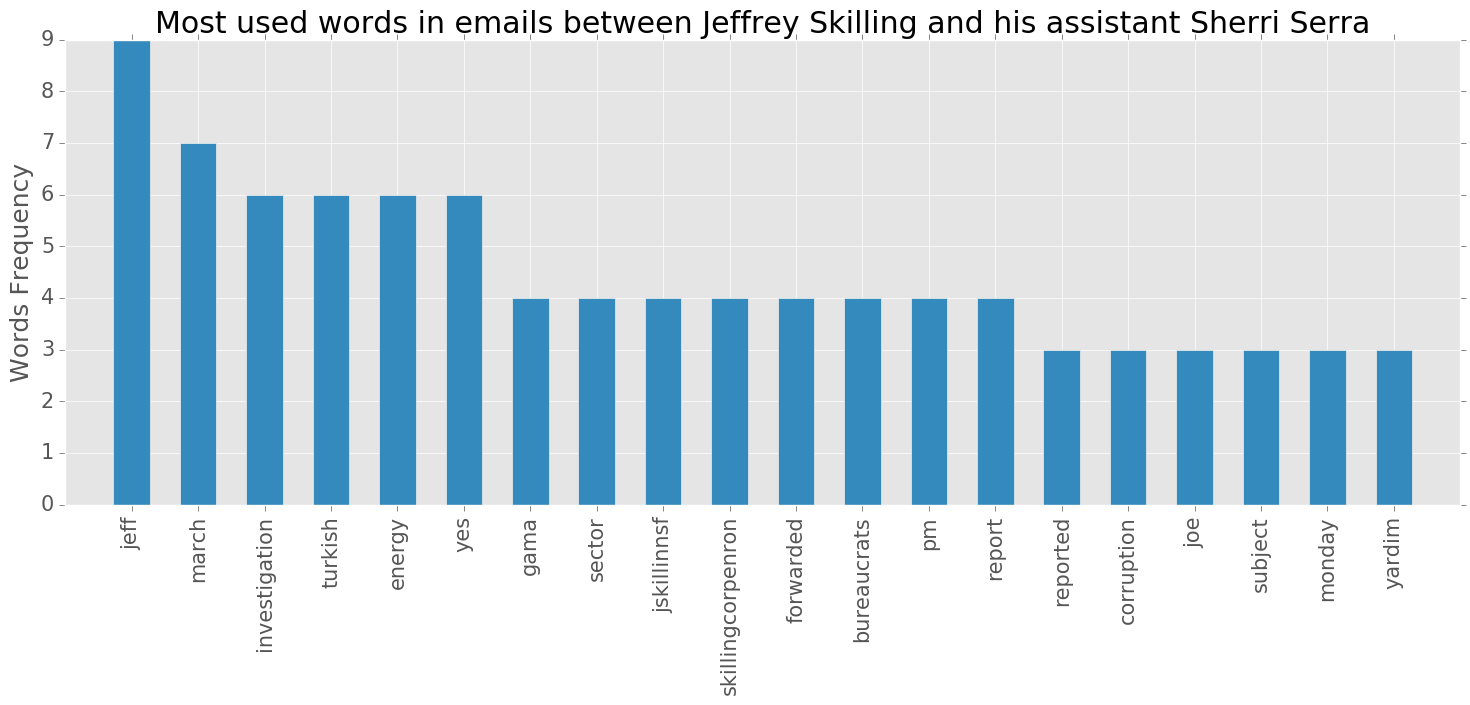

In [39]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
x_val = [x[0] for x in words_used]
y_val = [x[1] for x in words_used]

ind = np.arange(len(x_val))

plt.bar(ind, y_val, width=0.55, align='center')
plt.xticks(ind, x_val, rotation='vertical')
plt.xlim(-1, 20)
plt.ylabel("Words Frequency")
plt.title("Most used words in emails between Jeffrey Skilling and his assistant Sherri Serra")
plt.show()

The above graph gives us the count of words that were used between Jeffrey Skilling and his assistant Sherri Sera
From the graph it is clearly visible that investigation, energy, corruption etc were the words used in their email conversations

# Conclusion:

Some peculiar problems revealed were as follows: Kenneth Lay’s sent messages were actually that from his assistant Rosalee fleming, Jeff Skilling’s sent messages were that from his assistant Sherri sera. Over 30% of Jeff’s inbox messages
were about a donation drive and how much each employee pledged to contribute, which is clearly visible from above graph.
https://arxiv.org/ftp/arxiv/papers/1509/1509.00705.pdf